In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [85]:
img = cv2.imread('/home/sergei/Pictures/Webcam/2018-01-20-215718.jpg', cv2.IMREAD_COLOR)

In [86]:
im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY);

In [87]:
factor = 600. / im_gray.shape[1]
im_gray = cv2.resize(im_gray, None, fx = factor, fy = factor)
print('Image is %d by %d' % im_gray.shape)

Image is 450 by 600


In [120]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()
 
# Change thresholds
params.minThreshold = 0
params.maxThreshold = 250
 
# Filter by Area.
params.filterByArea = True
params.minArea = 10
 
# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = .5
 
# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.9
 
# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = .5

blur = cv2.blur(im_gray,(5,5))

# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs.
keypoints = detector.detect(blur)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im_gray, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
# Show keypoints
#cv2.imshow("Keypoints", im_with_keypoints)
#cv2.waitKey(0)

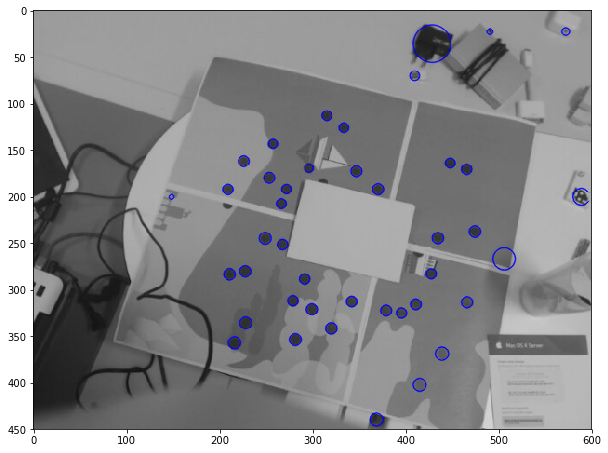

In [121]:
plt.figure(figsize=(10, 10))
plt.imshow(im_with_keypoints)

In [18]:
np.mean(im_gray)

131.20329752604167

In [22]:
len(keypoints)

AttributeError: 'list' object has no attribute 'size'